# Stemming, Lemmatization and Bigrams

## 1. Exploring the [reauters](http://www.nltk.org/book/ch02.html) corpus
Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora. NLTK comes with several interesting corpora, which are large collections of text. 

We will use the reuters corpora. The Reuters Corpus contains 10,788 news documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with `fileid` 'test/14826' is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document.

In [1]:
from nltk.corpus import reuters

reuters.readme().replace('\n', ' ') # Look at the README

'       The Reuters-21578 benchmark corpus, ApteMod version  This is a publically available version of the well-known Reuters-21578 "ApteMod" corpus for text categorization.  It has been used in publications like these:   * Yiming Yang and X. Liu. "A re-examination of text categorization    methods".  1999.  Proceedings of 22nd Annual International SIGIR.    http://citeseer.nj.nec.com/yang99reexamination.html   * Thorsten Joachims. "Text categorization with support vector    machines: learning with many relevant features".  1998. Proceedings    of ECML-98, 10th European Conference on Machine Learning.    http://citeseer.nj.nec.com/joachims98text.html  ApteMod is a collection of 10,788 documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents.  The total size of the corpus is about 43 MB.  It is also available for download from http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html , which inclu

In [2]:
reuters.fileids()[:30] # Preview the first 30 file ID's

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885']

In [3]:
reuters.fileids()[-30:] # Preview the last 30 file ID's, which happen to be training files

['training/9956',
 'training/9957',
 'training/9958',
 'training/9959',
 'training/9961',
 'training/9963',
 'training/9964',
 'training/9965',
 'training/9967',
 'training/9970',
 'training/9971',
 'training/9972',
 'training/9973',
 'training/9974',
 'training/9975',
 'training/9976',
 'training/9977',
 'training/9978',
 'training/998',
 'training/9981',
 'training/9982',
 'training/9984',
 'training/9985',
 'training/9988',
 'training/9989',
 'training/999',
 'training/9992',
 'training/9993',
 'training/9994',
 'training/9995']

In [4]:
len(reuters.fileids())

10788

Categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.

In [5]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [6]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [7]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

We can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [8]:
reuters.words('training/9865')[:14] # Preview the first 14 words

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [9]:
reuters.sents('test/14826')

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

# 2. Bigrams

In [10]:
trade_words = reuters.words(categories='trade') # Get words that are in the Trade category
trade_words

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

In [11]:
len(trade_words)

142723

trade_words is quite large so let's work with just a condensed version

In [12]:
trade_words_condensed = trade_words
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

In [13]:
from nltk.corpus import stopwords

# Remove stopwords from trade_words_condensed and make it all lowercase
trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:100]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 '.',
 '.',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 "'",
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 '-',
 'reaching',
 'economic',
 'damage',
 ',',
 'businessmen',
 'officials',
 'said',
 '.',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 '.',
 '.',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 '.',
 '.',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 '.',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long',
 '-',
 'run',
 ',',
 'short',
 '-',
 'term',
 'tokyo',
 "'",
 'loss',
 'might',
 'gain',
 '.',
 'u',
 '.',
 '.',
 'said',
 'impose',
 '300',
 'mln',
 'dlrs',
 'tariffs',
 'imports',
 'japanese',
 'electronics',
 'goods',
 'april',
 '17',
 ',',
 'retaliation',
 'japan',
 "'",
 'alleged',
 'failure',
 'stick']

### Return the bigrams generated from a sequence of items, as an iterator:

In [14]:
from nltk import bigrams

bigrams_trade_words_condensed = list(bigrams(trade_words_condensed))
bigrams_trade_words_condensed[:50]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', '.'),
 ('.', '.-'),
 ('.-', 'japan'),
 ('japan', 'rift'),
 ('rift', 'mounting'),
 ('mounting', 'trade'),
 ('trade', 'friction'),
 ('friction', 'u'),
 ('u', '.'),
 ('.', '.'),
 ('.', 'japan'),
 ('japan', 'raised'),
 ('raised', 'fears'),
 ('fears', 'among'),
 ('among', 'many'),
 ('many', 'asia'),
 ('asia', "'"),
 ("'", 'exporting'),
 ('exporting', 'nations'),
 ('nations', 'row'),
 ('row', 'could'),
 ('could', 'inflict'),
 ('inflict', 'far'),
 ('far', '-'),
 ('-', 'reaching'),
 ('reaching', 'economic'),
 ('economic', 'damage'),
 ('damage', ','),
 (',', 'businessmen'),
 ('businessmen', 'officials'),
 ('officials', 'said'),
 ('said', '.'),
 ('.', 'told'),
 ('told', 'reuter'),
 ('reuter', 'correspondents'),
 ('correspondents', 'asian'),
 ('asian', 'capitals'),
 ('capitals', 'u'),
 ('u', '.'),
 ('.', '.'),
 ('.', 'move'),
 ('move', 'japan'),
 ('japan', 'might'),
 ('might', 'boost'),
 ('boost', 'prot

### Create a frequency distribution

In [15]:
from nltk import FreqDist

bigram_freq_dist = FreqDist(bigrams_trade_words_condensed)

# preview the top 25 bigrams that occur the most often
for word, frequency in bigram_freq_dist.most_common(25): 
    print(word, frequency)

('u', '.') 1452
('.', '.') 1291
('said', '.') 818
('.', '"') 576
('billion', 'dlrs') 414
(',', 'said') 267
('united', 'states') 258
('trade', 'deficit') 225
('.', 'trade') 222
(',"', 'said') 217
('last', 'year') 212
('mln', 'dlrs') 208
('trade', 'surplus') 199
('1', '.') 196
('.', 'said') 186
('2', '.') 176
('.', 'u') 160
('japan', "'") 148
('.', '5') 138
('officials', 'said') 129
('current', 'account') 113
('.', 'japan') 103
('year', '.') 102
('year', ',') 100
('south', 'korea') 95


In [16]:
bigram_freq_dist.most_common(25)

[(('u', '.'), 1452),
 (('.', '.'), 1291),
 (('said', '.'), 818),
 (('.', '"'), 576),
 (('billion', 'dlrs'), 414),
 ((',', 'said'), 267),
 (('united', 'states'), 258),
 (('trade', 'deficit'), 225),
 (('.', 'trade'), 222),
 ((',"', 'said'), 217),
 (('last', 'year'), 212),
 (('mln', 'dlrs'), 208),
 (('trade', 'surplus'), 199),
 (('1', '.'), 196),
 (('.', 'said'), 186),
 (('2', '.'), 176),
 (('.', 'u'), 160),
 (('japan', "'"), 148),
 (('.', '5'), 138),
 (('officials', 'said'), 129),
 (('current', 'account'), 113),
 (('.', 'japan'), 103),
 (('year', '.'), 102),
 (('year', ','), 100),
 (('south', 'korea'), 95)]

**Convert FreqDist's output (which is a list of tuples) to two seperate lists and use it as input to plot.**

In [17]:
freq_dist_as_lists = list(map(list, zip(*bigram_freq_dist.most_common(25))))
top_25_bigrams = freq_dist_as_lists[0]
top_25_bigrams_freq_count = freq_dist_as_lists[1]
top_25_bigrams = [str(i) for i in top_25_bigrams]

## Plot the 25 Most Common Bigrams

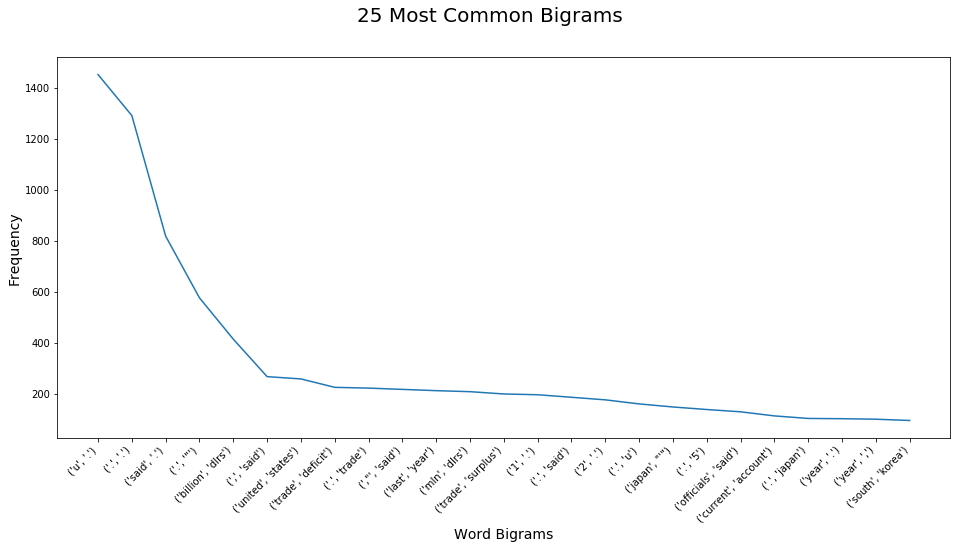

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16, 7))
ax = fig.gca() # Get current axes. This is the Axes object that is created by default when we make our figure

fig.suptitle('25 Most Common Bigrams', fontsize=20)
plt.xlabel('Word Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.setp(ax.get_xticklabels(), ha="right", rotation=45) # Specify a rotation for the tick labels 

'''Here I chose not to use matplotlib interface to plot instead of bigram_freq_dist.plot(25, cumulative=False) because it doesn't support rotated xaxis tick labels, which makes it very difficult for a human being to read'''
plt.plot(top_25_bigrams, top_25_bigrams_freq_count)

# 3. Stemming
Stemming is the process of reducing inflected (or derived) words to their root word also known as word stem. For example, the stem for `code, coding, coder, coders` is `code`. 

What are the benefits of stemming? It reduces the size of the corpus that our model will work with (especially helpful when working with large datasets). Additionally, we are helping our model by **explicitly** correlating words that have similar meanings. This is beneficial in case our model is not be able to figure out which words are related by using context only.

Stemming usually refers to a crude heuristic process that chops off the ends of words (affixes) to reduce redundancies in meaning. It's important to note that because stemming is based on heuristics errors like [overstemming or understemming](https://youtu.be/54k2JV3HlFc?t=69) can occur.

The most common algorithm for stemming English is Porter's algorithm.

For example, here's some **sample text**:

`Such an analysis can reveal features that are not easily visible from the variations in the individual genes and can lead to a picture of expression that is more biologically transparent and accessible to interpretation.` 

If we run it through the **Porter stemmer** we would get: 

`such an analysi can reveal featur that ar not easili visibl from the variat in the individu gene and can lead to a pictur of express that is more biolog transpar and access to interpret`

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english") # Create a new instance of a language specific subclass

# Can stem just one word at a time
print('Porter stemmer: ', porter.stem('Re-testing'))
print('Lancaster stemmer: ', lancaster.stem('Re-testing'))
print('Snowball stemmer: ', snowball.stem('Re-testing'))

Porter stemmer:  re-test
Lancaster stemmer:  re-testing
Snowball stemmer:  re-test


## Stemming Algorithms: Porter, Snowball, Lancaster
[[Source](https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8)]
* Porter stemmer: This stemming algorithm is an older one. It’s from the 1980s and its main concern is removing the common endings to words so that they can be resolved to a common form. It’s not too complex and development on it is frozen. Typically, it’s a nice starting basic stemmer, but it’s not really advised to use it for any production/complex application. Instead, it has its place in research as a nice, basic stemming algorithm that can guarantee reproducibility. It also is a very gentle stemming algorithm when compared to others.
* Snowball stemmer: This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer. That being said, it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.
* Lancaster stemmer: Just for fun, the Lancaster stemming algorithm is another algorithm that you can use. This one is the most aggressive stemming algorithm of the bunch. However, if you use the stemmer in NLTK, you can add your own custom rules to this algorithm very easily. It’s a good choice for that. One complaint around this stemming algorithm though is that it sometimes is overly aggressive and can really transform words into strange stems.

In [20]:
print('The \'english\' Snowball stemmer is better than the original \'porter\' stemmer. Let\'s stem the word \"generously":')
print('Snowball stemmer: ', SnowballStemmer("english").stem("generously"))
print('Porter stemmer: ', SnowballStemmer("porter").stem("generously"))

The 'english' Snowball stemmer is better than the original 'porter' stemmer. Let's stem the word "generously":
Snowball stemmer:  generous
Porter stemmer:  gener


In [21]:
print(lancaster.stem("generously")) # lancaster stemmer is aggressive

gen


**SnowballStemmber can stem several other languages beside English.**

In [22]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

## Stemming an Entire Sentence
Let's create a way to stem an entire sentence since the stemmers above can stem only one word at a time.

### Translation Table
**`str.maketrans`** builds a translation table, which is a mapping of integers or characters to integers, strings, or None. Think of it like a dictionary. We go through the string to translate and replace everything that appears as a key in the mapping with whatever its value in the map is.

Let's run through the 3-argument example:
```str.maketrans('abc', 'xyz', 'hij')```

You give it three strings. Each character in the first string is replaced by the character at that index in the second string. So `'a'` maps to `'x'`, `'b'` to `'y'`, and `'c'` to `'z'`. The characters `'h'`, `'i'`, `'j'` from the third string are removed, as if they were mapped to None. So your table is saying "Don't replace anything, but remove the characters that show up in this string".

In [23]:
from nltk import word_tokenize
import string

# Here's our sample sentence
sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

translation_table = str.maketrans('', '', string.punctuation) # Remove punctuations. Note that the first two arguments '', '' are simply placeholders since we aren't trying to repalce anything.
translation_table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

### Tokenize the words after they've been run through the translation table

In [24]:
tokens = word_tokenize(sentence.translate(translation_table))
tokens

['So',
 'well',
 'go',
 'no',
 'more',
 'aroving',
 'So',
 'late',
 'into',
 'the',
 'night',
 'Though',
 'the',
 'heart',
 'be',
 'still',
 'as',
 'loving',
 'And',
 'the',
 'moon',
 'be',
 'still',
 'as',
 'bright']

In [25]:
for stemmer in [porter, snowball, lancaster]:
    print('Porter:') if stemmer == porter else print('Snowball:') if stemmer == snowball else print('Lancaster:')
    print(' '.join([stemmer.stem(t) for t in tokens]), '\n')

Porter:
So well go no more arov So late into the night though the heart be still as love and the moon be still as bright 

Snowball:
so well go no more arov so late into the night though the heart be still as love and the moon be still as bright 

Lancaster:
so wel go no mor arov so lat into the night though the heart be stil as lov and the moon be stil as bright 



# 4. Lemmatization
Lemmatization aims to achieve a similar base "stem" for a word, but it derives the proper dictionary root word, not just a truncated version of the word.

## Here Are Some Differences Between Lemmatization and Stemming
1. Lemma is an actual language word whereas stemming might not be.
2. Lemmatizing uses WordNet (a large English dictionary) so it is slower than Stemming which just follows predefined steps.
3. When Lemmatizing you have to define the parts-of-speech (POS) to get the correct lemma. Lemmatization won't really work on single words alone without context or knowledge of its POS tag (i.e. we need to know whether the word is a noun, verb, adjective, adverb).

## Determining Which One to Use
It will depend on the application you are working on. If speed is the main focus then use a Stemmer because it consumes less time and processing. However, if you are building a language application where language is important then use Lemmatization because it uses a corpus to match root forms. 

**Let's do a few lemmatization examples:**

In [26]:
# WordNet is the default lemmatizer in NLTK
from nltk.stem import WordNetLemmatizer # lemmatizes word based on it's parts of speech

# Lemmatize using WordNet's built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.
wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'))

brightening


As we saw above, sometimes, if we try to lemmatize a word, it could end up with the same word. This is because by default, the WordNetLemmatizer.lemmatize() function will assume that the word is a **Noun** if there's no explict POS tag in the input.

To resolve the problem, always POS-tag your data before lemmatizing. Words can be in the form of Noun(n), Adjective(a), Verb(v), Adverb(r). [[tags](https://stackoverflow.com/questions/51634328/wordnetlemmatizer-different-handling-of-wn-adj-and-wn-adj-sat)]

So let's manually set the part-of-speech to verb.

In [27]:
# WordNet is another NLTK corpus reader. Use WordNet to get words in dictionary with their parts of speech
from nltk.corpus import wordnet as wn
wnl.lemmatize('brightening', pos=wn.VERB)

'brighten'

In [28]:
wnl.lemmatize('brightening', pos='v') # Alternatively we can also use this syntax

'brighten'

In [29]:
wnl.lemmatize('boxes', pos='n')

'box'

In [30]:
wnl.lemmatize('corpora', pos='n') # Noun. corpora -> corpus

'corpus'

In [31]:
wnl.lemmatize('better', pos='a') # Adjective. better -> good

'good'

In [32]:
wnl.lemmatize('rocks', pos='n') # Noun. rocks -> rock

'rock'